<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/dav-project/blob/main/Modelling_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Youtube_scrapping_comments.csv')

In [3]:
df.head()

,Video Link,Video Title,Cleaned_Comments,item
0,https://www.youtube.com/watch?v=F1pUDSue8mQ&pp...,World leaders arrive at the Bharat Mandapam in...,@mjfansumit - I proud that at this event I wor...,G20 2023
1,https://www.youtube.com/watch?v=X8rM829c7to&pp...,PM Modi addresses The Hindustan Times Leadersh...,@priyachattaraj9926 - I proud of you modi sir ...,G20 2023
2,https://www.youtube.com/watch?v=dbgGV5-TrdE&pp...,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023
3,https://www.youtube.com/watch?v=G_O8ogCpbRI&pp...,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,@mukundrajan8961 - The list of invitees / part...,G20 2023
4,https://www.youtube.com/watch?v=Lf-hYTjapiw&pp...,Turkish Parliament Boycotts Coca Cola and Nest...,@DhimanBharadwaj - Very much proud to see Bhar...,G20 2023


In [6]:
df=df.drop(columns=['Video Link'])

Tokenization:

Break each comment into individual words or tokens.

You can use the nltk library for this:



In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['Tokenized_Comments'] = df['Cleaned_Comments'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Removing Stopwords:

Remove common words (stopwords) that do not contribute much to the meaning of the comments.

You can use the nltk library for this:

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Filtered_Comments'] = df['Tokenized_Comments'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

## Lemmatization:

Reduce words to their base or root form.

You can use the nltk library or spaCy for lemmatization:

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Lemmatized_Comments'] = df['Filtered_Comments'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

## Word Frequency Analysis:

Analyze the frequency of words in the comments.

You can use the nltk library for this:

We have already did this in analysis part.

## Sentiment Analysis:
Here we are first using nltk library for this.

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Cleaned_Comments'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))


In [20]:
df.head()

,Video Title,Cleaned_Comments,item,Tokenized_Comments,Filtered_Comments,Lemmatized_Comments,Sentiment_Score,Sentiment_Label
0,World leaders arrive at the Bharat Mandapam in...,@mjfansumit - I proud that at this event I wor...,G20 2023,"[@, mjfansumit, -, I, proud, that, at, this, e...","[@, mjfansumit, -, proud, event, worked, whole...","[@, mjfansumit, -, proud, event, worked, whole...",0.9989,Positive
1,PM Modi addresses The Hindustan Times Leadersh...,@priyachattaraj9926 - I proud of you modi sir ...,G20 2023,"[@, priyachattaraj9926, -, I, proud, of, you, ...","[@, priyachattaraj9926, -, proud, modi, sir, ....","[@, priyachattaraj9926, -, proud, modi, sir, ....",0.9881,Positive
2,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023,"[-, प्रश्न, ., G20, की, स्थापना, किस, वर्ष, हु...","[-, प्रश्न, ., G20, की, स्थापना, किस, वर्ष, हु...","[-, प्रश्न, ., G20, की, स्थापना, किस, वर्ष, हु...",0.9993,Positive
3,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,@mukundrajan8961 - The list of invitees / part...,G20 2023,"[@, mukundrajan8961, -, The, list, of, invitee...","[@, mukundrajan8961, -, list, invitees, /, par...","[@, mukundrajan8961, -, list, invitee, /, part...",0.9986,Positive
4,Turkish Parliament Boycotts Coca Cola and Nest...,@DhimanBharadwaj - Very much proud to see Bhar...,G20 2023,"[@, DhimanBharadwaj, -, Very, much, proud, to,...","[@, DhimanBharadwaj, -, much, proud, see, Bhar...","[@, DhimanBharadwaj, -, much, proud, see, Bhar...",1.0000,Positive


<Axes: ylabel='Sentiment_Score'>

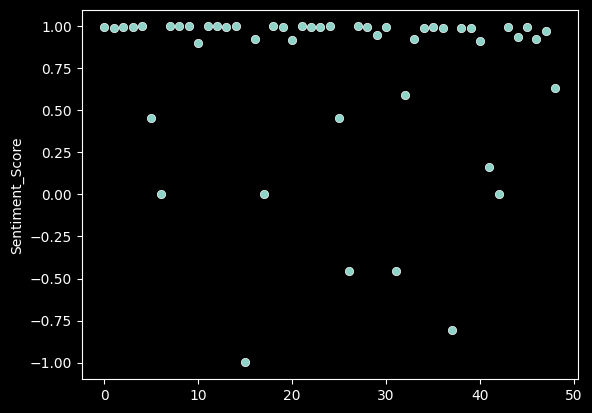

In [24]:
plt.style.use('dark_background')
sns.scatterplot(df['Sentiment_Score'])

## Now doing same thing with deep-learning based transformer method

In [30]:
df1=df[['Video Title','Cleaned_Comments','item']]
df1.head()

,Video Title,Cleaned_Comments,item
0,World leaders arrive at the Bharat Mandapam in...,@mjfansumit - I proud that at this event I wor...,G20 2023
1,PM Modi addresses The Hindustan Times Leadersh...,@priyachattaraj9926 - I proud of you modi sir ...,G20 2023
2,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023
3,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,@mukundrajan8961 - The list of invitees / part...,G20 2023
4,Turkish Parliament Boycotts Coca Cola and Nest...,@DhimanBharadwaj - Very much proud to see Bhar...,G20 2023


In [41]:
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis')
df1['Sentiment_Prediction'] = df1['Cleaned_Comments'].apply(lambda x: sentiment_pipeline(x[:512])[0])
df1['Sentiment_Label'] = df1['Sentiment_Prediction'].apply(lambda prediction: prediction['label'])
sentiment_label_map = {'POSITIVE': 'Positive', 'NEGATIVE': 'Negative', 'NEUTRAL': 'Neutral','COMPOUND':'Compound'}
df1['Sentiment_Label'] = df1['Sentiment_Label'].map(sentiment_label_map)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
<ipython-input-41-18fe8a5dfdd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment_Prediction'] = df1['Cleaned_Comments'].apply(lambda x: sentiment_pipeline(x[:512])[0])
<ipython-input-41-18fe8a5dfdd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [42]:
df1.Sentiment_Label.value_counts()

Positive    34
Negative    15
Name: Sentiment_Label, dtype: int64

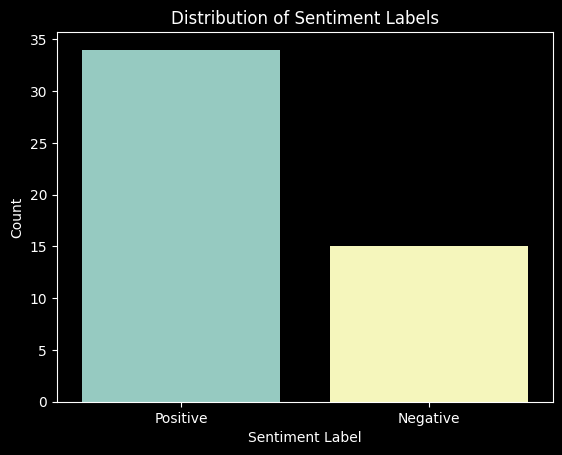

In [43]:
sns.countplot(data=df1, x='Sentiment_Label')

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')

# Show the plot
plt.show()

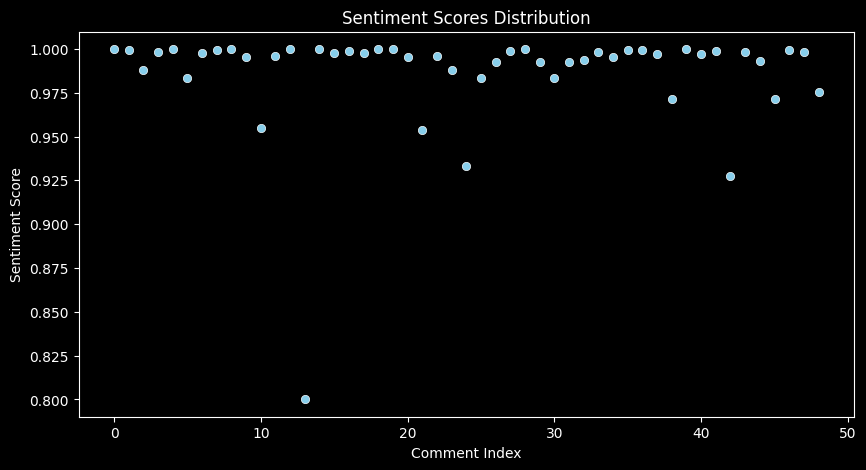

In [49]:
x= df['Sentiment_Prediction'].apply(lambda x: x['score'])

# Plot the scores
plt.figure(figsize=(10, 5))
sns.scatterplot(x, color='skyblue')
plt.xlabel('Comment Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores Distribution')
plt.show()

## So we can see both nltk and transformer are giving almost same graph.

In [ ]:
## In conclusion we say public relation are majorily in good health in favour of G20 event.